## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(rate = 0.25)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.85, 0.9, 0.95]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMEMTUM = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov= False, momentum=mo)
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mo-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMEMTUM = 0.850000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer4 (Dense)  

50000/50000 [==============================] - 7s 142us/step - loss: 0.2935 - accuracy: 0.9001 - val_loss: 0.2844 - val_accuracy: 0.9004
Epoch 44/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.2930 - accuracy: 0.9001 - val_loss: 0.2838 - val_accuracy: 0.9006
Epoch 45/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.2925 - accuracy: 0.9001 - val_loss: 0.2832 - val_accuracy: 0.9007
Epoch 46/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2919 - accuracy: 0.9002 - val_loss: 0.2827 - val_accuracy: 0.9009
Epoch 47/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.2918 - accuracy: 0.9002 - val_loss: 0.2822 - val_accuracy: 0.9008
Epoch 48/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.2912 - accuracy: 0.9002 - val_loss: 0.2816 - val_accuracy: 0.9009
Epoch 49/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.2907 - accuracy: 0.9001 - val_loss

50000/50000 [==============================] - 7s 145us/step - loss: 0.2875 - accuracy: 0.9003 - val_loss: 0.2764 - val_accuracy: 0.9013
Epoch 36/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.2866 - accuracy: 0.9004 - val_loss: 0.2757 - val_accuracy: 0.9014
Epoch 37/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2862 - accuracy: 0.9004 - val_loss: 0.2752 - val_accuracy: 0.9014
Epoch 38/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.2855 - accuracy: 0.9002 - val_loss: 0.2745 - val_accuracy: 0.9016
Epoch 39/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2849 - accuracy: 0.9003 - val_loss: 0.2739 - val_accuracy: 0.9016
Epoch 40/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.2842 - accuracy: 0.9006 - val_loss: 0.2732 - val_accuracy: 0.9017
Epoch 41/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2841 - accuracy: 0.9006 - val_loss:

50000/50000 [==============================] - 5s 96us/step - loss: 0.2793 - accuracy: 0.9008 - val_loss: 0.2682 - val_accuracy: 0.9022
Epoch 28/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.2779 - accuracy: 0.9009 - val_loss: 0.2668 - val_accuracy: 0.9023
Epoch 29/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.2774 - accuracy: 0.9009 - val_loss: 0.2662 - val_accuracy: 0.9024
Epoch 30/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.2765 - accuracy: 0.9010 - val_loss: 0.2651 - val_accuracy: 0.9027
Epoch 31/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.2756 - accuracy: 0.9013 - val_loss: 0.2643 - val_accuracy: 0.9027
Epoch 32/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.2750 - accuracy: 0.9012 - val_loss: 0.2634 - val_accuracy: 0.9030
Epoch 33/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.2740 - accuracy: 0.9013 - val_loss: 0.2626

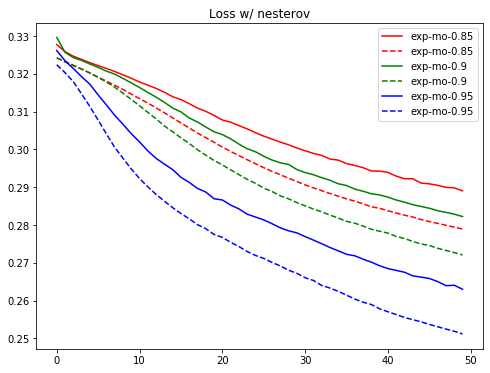

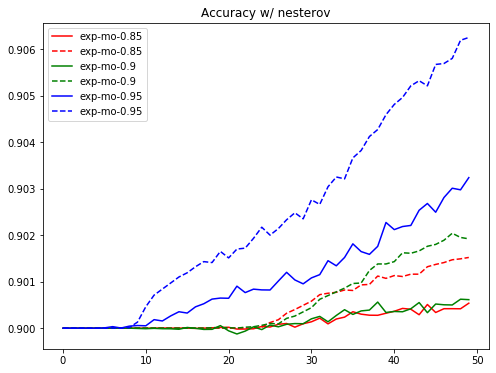

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss w/ nesterov")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy w/ nesterov")
plt.legend()
plt.show()

## 結論一 : momemtum越大, 收斂越快

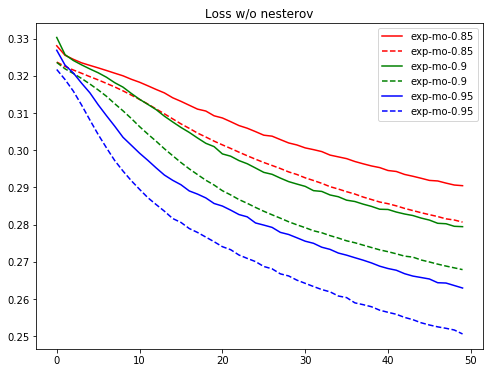

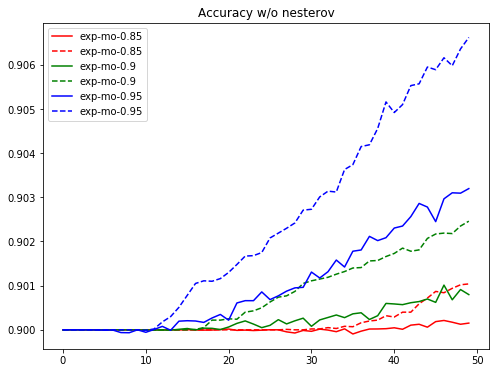

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss w/o nesterov")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy w/o nesterov")
plt.legend()
plt.show()

## 結論二 : 是否使用nesterov, 在模型的收斂表現上, 差異不顯著.